In [1]:
from ds_loader import Dataset_Handler
import numpy
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.utils import make_grid
from torchvision.models.mobilenet import mobilenet_v2
from pathlib import Path
from meanAveragePrecision import computeMeanAveragePrecision
import numpy as np
from sklearn.metrics import f1_score

In [2]:
# Configure all Hyperparameteres
class Config():
    batch_size = 32
    epochs = 50
    learn_rate = 0.0001
    CLASSES = 55
    DATABASE_FOLDER_TRAIN = str(Path("../../dataset/training/"))
    DATABASE_FOLDER_TEST = str(Path("../../dataset/testing/"))
    SAMPLING_RATE = 400
    SEED = 871253
    #weight_decay = 0.001

In [3]:
# initialise Dataset_Handler to build Dataset and Dataloader
dsh = Dataset_Handler(  train_dir=Config.DATABASE_FOLDER_TRAIN,
                        test_dir=Config.DATABASE_FOLDER_TEST,
                        sampling_rate=Config.SAMPLING_RATE,
                        seed=Config.SEED)

In [5]:
# This cell is used to build and store our combined data set. After that it does not need to be executed.
dsh.get_dataset(is_train=True, save=True)
dsh.get_dataset(is_train=False, save=True)

Computed:	  trainMSAccelerometer.npy
Computed:	  trainMSGyroscope.npy
Computed:	  trainMagnetometer.npy

 Computing the  TESTING  directory .....
Excluded:	  jesse_stacked_data.npy
Excluded:	  stacked_data.npy
Computed:	  testAccelerometer.npy
Computed:	  testGravity.npy
Computed:	  testGyroscope.npy
Computed:	  testJinsAccelerometer.npy
Computed:	  testJinsGyroscope.npy
Excluded:	  testLabels.npy
Computed:	  testLinearAcceleration.npy
Computed:	  testMSAccelerometer.npy
Computed:	  testMSGyroscope.npy
Computed:	  testMagnetometer.npy


array([[[[-2.50998068e+00, -1.11000001e+00, -3.23840380e-01, ...,
           1.09106445e+00, -1.02500000e+02,  1.50625000e+01],
         [ 9.19208527e+00,  9.73999977e+00, -1.18244357e-01, ...,
           5.54199219e-02, -1.12804878e+00, -3.37500000e+00],
         [ 4.19128448e-01, -2.39999995e-01,  3.51537280e-02, ...,
           2.10449219e-01, -4.58841476e+01, -2.43750000e+00]],

        [[-2.12876773e+00, -1.18005753e+00, -3.39849114e-01, ...,
           1.02097583e+00, -8.29897614e+01,  1.47567587e+01],
         [ 9.42727375e+00,  9.72998333e+00, -1.71553388e-01, ...,
           4.59505171e-02, -2.71516538e+00, -2.86226940e+00],
         [ 1.15933025e+00, -1.79925159e-01, -1.60293970e-02, ...,
           2.29346827e-01, -4.71990204e+01, -1.80099761e+00]],

        [[-2.48367405e+00, -1.21010780e+00, -3.69693577e-01, ...,
           9.56207037e-01, -6.21832047e+01,  1.40044899e+01],
         [ 1.04521770e+01,  9.72999763e+00, -2.13131666e-01, ...,
           3.24919224e-02, -4.6928


 Computing the  TRAINING  directory .....
Excluded:	  jesse_stacked_data.npy
Excluded:	  stacked_data.npy
Computed:	  trainAccelerometer.npy
Computed:	  trainGravity.npy
Computed:	  trainGyroscope.npy
Computed:	  trainJinsAccelerometer.npy
Computed:	  trainJinsGyroscope.npy
Excluded:	  trainLabels.npy
Computed:	  trainLinearAcceleration.npy
Computed:	  trainMSAccelerometer.npy
Computed:	  trainMSGyroscope.npy
Computed:	  trainMagnetometer.npy

 Computing the  TESTING  directory .....
Excluded:	  jesse_stacked_data.npy
Excluded:	  stacked_data.npy
Computed:	  testAccelerometer.npy
Computed:	  testGravity.npy
Computed:	  testGyroscope.npy
Computed:	  testJinsAccelerometer.npy
Computed:	  testJinsGyroscope.npy
Excluded:	  testLabels.npy
Computed:	  testLinearAcceleration.npy
Computed:	  testMSAccelerometer.npy
Computed:	  testMSGyroscope.npy
Computed:	  testMagnetometer.npy


array([[[[-2.50998068e+00, -1.11000001e+00, -3.23840380e-01, ...,
           1.09106445e+00, -1.02500000e+02,  1.50625000e+01],
         [ 9.19208527e+00,  9.73999977e+00, -1.18244357e-01, ...,
           5.54199219e-02, -1.12804878e+00, -3.37500000e+00],
         [ 4.19128448e-01, -2.39999995e-01,  3.51537280e-02, ...,
           2.10449219e-01, -4.58841476e+01, -2.43750000e+00]],

        [[-2.12876773e+00, -1.18005753e+00, -3.39849114e-01, ...,
           1.02097583e+00, -8.29897614e+01,  1.47567587e+01],
         [ 9.42727375e+00,  9.72998333e+00, -1.71553388e-01, ...,
           4.59505171e-02, -2.71516538e+00, -2.86226940e+00],
         [ 1.15933025e+00, -1.79925159e-01, -1.60293970e-02, ...,
           2.29346827e-01, -4.71990204e+01, -1.80099761e+00]],

        [[-2.48367405e+00, -1.21010780e+00, -3.69693577e-01, ...,
           9.56207037e-01, -6.21832047e+01,  1.40044899e+01],
         [ 1.04521770e+01,  9.72999763e+00, -2.13131666e-01, ...,
           3.24919224e-02, -4.6928

In [6]:
# setup Dataloader
train_dl = dsh.get_dataloader(is_train=True, batch_size=Config.batch_size)
test_dl = dsh.get_dataloader(is_train=False, batch_size=Config.batch_size)

In [45]:
# check for device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [46]:
#define model
model = mobilenet_v2(pretrained=True)
model.features[0][0] = nn.Conv2d(9, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
model.classifier[1] = nn.Linear(in_features=model.classifier[1].in_features, out_features=Config.CLASSES)
model.to(device)

# define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=Config.learn_rate)
# define loss function
loss_function = nn.CrossEntropyLoss()

# check if model is on correct device
next(model.parameters()).is_cuda

True

===> Epoch: 0 loss: 3.3411
===> Epoch: 1 loss: 3.0842
===> Epoch: 2 loss: 2.0327
===> Epoch: 3 loss: 2.7150
===> Epoch: 4 loss: 2.2012
===> Epoch: 5 loss: 1.4872
===> Epoch: 6 loss: 2.4446
===> Epoch: 7 loss: 1.6553
===> Epoch: 8 loss: 1.6504
===> Epoch: 9 loss: 0.7895
===> Epoch: 10 loss: 1.8254
===> Epoch: 11 loss: 1.7932
===> Epoch: 12 loss: 1.3651
===> Epoch: 13 loss: 1.5612
===> Epoch: 14 loss: 1.0431
===> Epoch: 15 loss: 0.6316
===> Epoch: 16 loss: 0.7429
===> Epoch: 17 loss: 0.9841
===> Epoch: 18 loss: 0.8134
===> Epoch: 19 loss: 0.8358
===> Epoch: 20 loss: 1.5072
===> Epoch: 21 loss: 1.0862
===> Epoch: 22 loss: 0.5918
===> Epoch: 23 loss: 0.7332
===> Epoch: 24 loss: 0.9686
===> Epoch: 25 loss: 0.5195
===> Epoch: 26 loss: 0.7208
===> Epoch: 27 loss: 0.2380
===> Epoch: 28 loss: 0.3799
===> Epoch: 29 loss: 0.4542
===> Epoch: 30 loss: 1.9092
===> Epoch: 31 loss: 0.3600
===> Epoch: 32 loss: 0.6250
===> Epoch: 33 loss: 0.5518
===> Epoch: 34 loss: 0.4572
===> Epoch: 35 loss: 0.2481
==

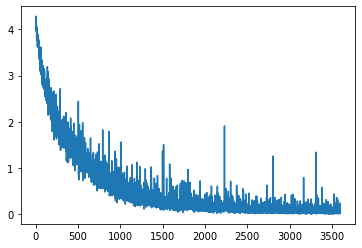

In [47]:
# Traning Process
loss_ls_train = []
model.train()

for epoch in range(Config.epochs):
    for data, labels in train_dl:
        data, labels = data.to(device), labels.to(device)

        optimizer.zero_grad()
        data = data.permute(0, 3, 1, 2)

        prediction = model(data)

        loss = loss_function(prediction, labels)
        loss.backward()
        optimizer.step()

        loss_ls_train.append(loss.data.item())

    print('===> Epoch: {} loss: {:.4f}'.format(epoch, loss.data.item()))

plt.plot(loss_ls_train)
plt.show()

In [54]:
# Uncommend the line below to load and evaluate a trained model.
# model = torch.load('/Users/falcolentzsch/Develope/MDS4AGT/krasses_model.pt',map_location=device)


# Start Evaluation

model.eval()
correct_pred = 0
num_pred = 0
map_sum = 0
f1_sum = 0
count = 0


for data, label in test_dl:
    data, label = data.to(device), label.to(device)

    data = data.permute(0, 3, 1, 2)
    softmax_v = F.softmax(model(data), dim=1)
    pred = torch.argmax(softmax_v, dim=1)

    num_pred += len(label)
    correct_pred = correct_pred + torch.eq(pred,label).sum().data.item()

    tmp_map, _ = computeMeanAveragePrecision(label.detach().cpu().numpy(), softmax_v.detach().cpu().numpy())
    map_sum += tmp_map
    count +=1

    f1_sum += f1_score(y_true=label.detach().cpu().numpy(), y_pred=pred.detach().cpu().numpy(), average='micro' )

print('Number of correct predictions: ' + str(correct_pred))
print('Number of Predictions:' + str(num_pred))
print('Accuracy: ' + str(correct_pred/num_pred))
print('F1-score: ' + str(f1_sum/count))
print('MAP: ' + str(map_sum/count))

Number of correct predictions: 1324
Number of Predictions:2288
Accuracy: 0.5786713286713286
F1-score: 0.5798611111111112
MAP: 0.3459739852696657


In [50]:
# Uncomment the line below to save a trained model.
# torch.save(model, 'model.pt')